In [12]:
import  pyide
import importlib
importlib.reload(pyide)
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
from imp import reload # for debugging
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Direct input 
plt.rcParams['text.latex.preamble']=r"\usepackage{lmodern}"
#Options
params = {'text.usetex' : True,
          'font.size' : 11,
          #'font.family' : 'lmodern',
          #'text.latex.unicode': True,
          }
plt.rcParams.update(params)

In [3]:
alpha=0.2
beta=0.8
mu=0.3

H = lambda x : np.heaviside(x, 1)

g = lambda x : H(x-alpha) - (1-mu)*H(x-beta)

import matplotlib.pyplot as plt

U = np.arange(0, 1, 0.01)
k = lambda x: 1/2 * np.exp(-np.abs(x))

model = pyide.IDEModel(growthFunction=pyide.GrowthFunction(g),
                  dispersalKernel=pyide.DisperalKernel(k))
                  
                
sim = pyide.IDESimulation(model)
sim.setDomain(xmin=-10, xmax=10, dx=0.005)

4

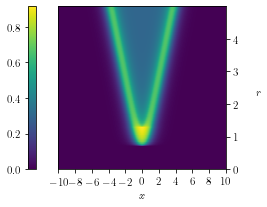

In [13]:

# this chunk generates and plots heatmap
filename = 'fig6a'
fig_size_x=4
fig_size_y=3

L = []
r_values = np.arange(0, 4, 0.01)
for r in r_values:
    sim.timeSeries = []
    sim.setInitialCondition(lambda x : H(x+r)-H(x-r))
    sim.setBoundaryCondition('static')
    sim.run(3)
    L.append(sim.timeSeries[3])

fig, ax = plt.subplots()

heatmap = ax.imshow(np.array(L), cmap='viridis', interpolation='none', 
          aspect='auto',extent=[min(sim.domain),max(sim.domain),5,0])
fig.colorbar(heatmap, location='left')

ax.set_xlabel('$x$')
ax.set_ylabel('$r$', labelpad = 20,rotation=0)

ax.set_xticks(np.linspace(-10,10,11,endpoint=True))
ax.set_yticks(np.linspace(0,4,5,endpoint=True))

ax.invert_yaxis()

plt.yticks(rotation=0)

ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()

# ax.view_init(elev=10., azim=50)

fig.set_size_inches(fig_size_x,fig_size_y)
dpi = 1000
plt.savefig(filename+'.pdf', 
            #This is simple recomendation for publication plots
            dpi=dpi, 
            # Plot will be occupy a maximum of available space
            bbox_inches='tight', 
            )

n = dpi * fig_size_x
os.system('convert -resize '+str(n)+' '+filename+'.pdf '+filename+'.png')

4

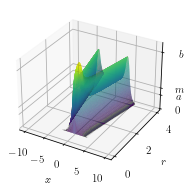

In [14]:
# this chunk generates the 3d plot
filename ='fig6b'
fig_size_x=4
fig_size_y=3

X, Y = np.meshgrid(sim.domain, r_values)
Z = np.array(L)

#matplotlib.rcParams['text.usetex'] = True

fig =plt.figure()
ax =fig.add_subplot(111,projection='3d')

surf = ax.plot_surface(X,Y,Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

#fig.colorbar(surf, shrink=0.5, aspect=10, location='left')
#fig.colorbar(surf,location='left')
ax.set_xlabel('$x$')
ax.set_ylabel('$r$')
ax.zaxis.set_rotate_label(False)  # disable automatic rotation
#ax.set_zlabel('$Q[\mu](x,r)$', rotation=0, labelpad=20)
ax.set_xticks(np.linspace(-10,10,5,endpoint=True))
ax.set_yticks(np.linspace(0,4,3))
ax.set_zticks([0,alpha,mu,beta])
ax.set_zticklabels(['$0$','$a$','$m$','$b$'])
#ax.view_init(elev=10., azim=50)
#ax.set_title('surface');
#plt.savefig('fig6b.pdf')

fig.set_size_inches(fig_size_x,fig_size_y)
dpi = 1000
plt.savefig(filename+'.pdf', 
            #This is simple recomendation for publication plots
            dpi=dpi, 
            # Plot will be occupy a maximum of available space
            bbox_inches='tight', 
            )

n = dpi * fig_size_x
os.system('convert -resize '+str(n)+' '+filename+'.pdf '+filename+'.png')